In [1]:
pwd

'/fast/AG_Bunina/Yusuf/jobs'

In [2]:
cd '/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/Python_Project/ScenicPlus/Zhu_et_al'

/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/Python_Project/ScenicPlus/Zhu_et_al


In [4]:
ls

10_03_24_Authors_episcanpy_tutorial.ipynb*
12_03_24_Sparse_DF_object_generation_from_ATAC_matrix.ipynb
12_03_24_cell_subsampling_for_topic_modelling.ipynb*
13_03_24_Exploration_of_topics_and_clustering_and_UMAP.ipynb*
13_03_24_filtering_adata_objects_and_cistopic_object_generation.ipynb*
13_03_24_filtering_of_features_of_7269_cells_based_on_variability.ipynb*
15_03_24_SCENICPLUS_Inferring_candidate_enhancer_regions.ipynb*
EpiScanpy_ATAC_preprocess.ipynb*
EpiScanpy_ATAC_preprocess_MODIFIED.ipynb
Mallet_models_500.pkl
Mallet_models_w_7269_cells.pkl
Mallet_models_w_7269_cells_feeatures_filtered.pkl
Zhu_et_al/
Zhu_et_al_ATAC_processing.ipynb
Zhu_et_al_ATAC_processing_MODIFIED.ipynb*
Zhu_et_al_RNA_preprocess.ipynb
Zhu_et_al_peak_count_matrix_preparation_for_python.R
adata_ATAC_modified.h5ad
adata_ATAC_prepared.h5ad
adata_blacklist_filtered.pkl
adata_subset_7269_cells.h5ad
adata_subset_7269_cells.pkl
adata_subset_filtered_by_variability.h5ad
adata_subset_filtered_cells_features.h5ad
cisTopic

In [ ]:
# Let’s explore some of the results. Below we show the motifs found for topic 11 (specific to VECs) using DEM.

In [6]:
import dill
menr = dill.load(open('motifs/menr.pkl', 'rb'))

In [7]:
menr['DEM_topics_otsu_All'].DEM_results('Topic11')

,Logo,Contrast,Direct_annot,Orthology_annot,Log2FC,Adjusted_pval,Mean_fg,Mean_bg,Motif_hit_thr,Motif_hits
metacluster_126.14,,Topic11,ZBTB12,NaN,1.478456,0.034469,0.295239,0.105953,3.0,965.0
transfac_pro__M06111,,Topic11,ZNF254,NaN,0.990898,0.038574,0.195849,0.098544,3.0,532.0
kznf__KLF1_Barrera2016.2_PBM,,Topic11,KLF1,NaN,0.966315,0.0,1.045965,0.535337,3.0,3640.0
hocomoco__ZBT14_HUMAN.H11MO.0.C,,Topic11,ZBTB14,NaN,0.958871,0.0,0.703885,0.362121,3.0,1804.0
taipale_tf_pairs__E2F3_HES7_NNNNGCGCSNNNNNCACGTGNN_CAP,,Topic11,"E2F3, HES7",NaN,0.954004,0.006323,0.196389,0.101376,3.0,366.0
kznf__ZNF441_Imbeault2017_RP_RCADE,,Topic11,ZNF441,NaN,0.943448,0.0,0.982877,0.511085,3.0,2854.0
transfac_pro__M05845,,Topic11,ZSCAN29,NaN,0.93427,0.000037,0.37605,0.19679,3.0,974.0
kznf__ZBTB14_Schmitges2016_RCADE,,Topic11,ZBTB14,NaN,0.915709,0.0,0.56474,0.299359,3.0,1670.0
taipale_cyt_meth__E2F2_GCGCGCGCGYW_eDBD_repr,,Topic11,E2F2,NaN,0.915013,0.00422,0.28273,0.149943,3.0,692.0
kznf__ZNF846_Imbeault2017_OM_MEME,,Topic11,ZNF846,NaN,0.911967,0.0,1.254744,0.666846,3.0,3743.0


In [10]:
menr['DEM_topics_otsu_All'].DEM_results('Topic8') # enriched in EN fetal late and a subset of EN cells.

,Logo,Contrast,Direct_annot,Orthology_annot,Log2FC,Adjusted_pval,Mean_fg,Mean_bg,Motif_hit_thr,Motif_hits
cisbp__M00304,,Topic8,VENTX,NaN,0.909443,0.001814,0.490303,0.261033,3.0,585.0
tfdimers__MD00283,,Topic8,POU2F1,NaN,0.744549,0.002826,0.404555,0.24146,3.0,485.0
transfac_pro__M06902,,Topic8,ZNF611,NaN,0.72682,0.021646,0.465533,0.281291,3.0,670.0
taipale__Irx3_DBD_NWACATGAMAWN_repr,,Topic8,NaN,IRX3,0.714348,0.009988,0.340332,0.207426,3.0,360.0
tfdimers__MD00499,,Topic8,"TBP, TAF6, POU5F1",NaN,0.696856,0.000087,0.812224,0.501073,3.0,1093.0
tfdimers__MD00202,,Topic8,"TBP, TAF6",NaN,0.688298,0.003125,0.416808,0.258665,3.0,526.0
metacluster_17.1,,Topic8,"NEUROD2, MSC, TCF21, TCF3, TAL1, ZBTB18, BHLHA15, OLIG2, MESP2, BHLHE22, OLIG3, BHLHE23, NEUROD1, TCF4, OLIG1","TCF12, TCF3, TWIST1, NEUROG1, NEUROG2, BHLHA15, OLIG2, BHLHE22, MSGN1, TCF4, ATOH1",0.684523,0.000389,0.842142,0.523991,3.0,1165.0
scertf__pachkov.SPT15,,Topic8,NaN,TBPL2,0.674306,0.002826,0.476449,0.298559,3.0,546.0
metacluster_27.15,,Topic8,ZNF211,NaN,0.661515,0.002404,0.371817,0.235068,3.0,327.0
tfdimers__MD00306,,Topic8,PAX4,NaN,0.651819,0.014825,0.45401,0.288967,3.0,513.0


In [11]:
# We now have completed all the steps necessary for starting the SCENIC+ analysis 😅.

# In particular, we have preprocessed the scRNA-seq side of the data, selecting high quality cells and annotation these cells.

# We preprocessed the scATAC-seq side of the data, selecting high quality cells, performing topic modeling and identifying candidate enhacer regions.

# We looked for enriched motifs in candidate enhancer regions.

# In the next section we will combine all these analysis and run SCENIC+

In [13]:
import dill
import scanpy as sc
import os
import warnings
warnings.filterwarnings("ignore")
import pandas
import pyranges
# Set stderr to null to avoid strange messages from ray
import sys
_stderr = sys.stderr
null = open(os.devnull,'wb')
tmp_dir = '/fast/AG_Bunina/Yusuf/temp_scratch/'
adata = sc.read_h5ad(os.path.join('Zhu_et_al', 'scRNA/adata_processed.h5ad'))
cistopic_obj = dill.load(open('cistopic_obj_filtered_features_w_topics_clusters.pkl', 'rb'))
menr = dill.load(open('motifs/menr.pkl', 'rb'))

In [348]:
adata

AnnData object with n_obs × n_vars = 44330 × 30109
    obs: 'author_cell_type', 'age_group', 'donor_id', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'TSS_percentile', 'nucleosome_signal', 'percent_mt', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'is_primary_data', 'batch', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'celltype'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly

In [16]:
cistopic_obj.cell_data

,cisTopic_nr_frag,cisTopic_log_nr_frag,cisTopic_nr_acc,cisTopic_log_nr_acc,sample_id,author_cell_type,age_group,donor_id,nCount_RNA,nFeature_RNA,...,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid,pycisTopic_leiden_10_0.6,author_cell_type_STRING,cell_type_STRING
8_CTCTGTTCAATGCGCT-1___cisTopic,2606,3.415974,2282,3.358316,cisTopic,EN-fetal-late,late fetal,LaFet2,12322,4021.0,...,normal,Homo sapiens,female,cortical plate,unknown,24th week post-fertilization human stage,`|DJ^&j!PR,3,EN-fetal-late,glutamatergic neuron
8_AATACCGGTGCTTTAC-1___cisTopic,4330,3.636488,3637,3.560743,cisTopic,EN-fetal-late,late fetal,LaFet2,6869,2734.0,...,normal,Homo sapiens,female,cortical plate,unknown,24th week post-fertilization human stage,CU!-kqPeF|,3,EN-fetal-late,glutamatergic neuron
8_CTAACCCTCGCAAACT-1___cisTopic,2289,3.359646,2020,3.305351,cisTopic,EN-fetal-late,late fetal,LaFet2,5334,2378.0,...,normal,Homo sapiens,female,cortical plate,unknown,24th week post-fertilization human stage,rFBeFXKjo#,3,EN-fetal-late,glutamatergic neuron
8_TTTGGTGCACCTCGCT-1___cisTopic,259,2.4133,249,2.396199,cisTopic,EN-fetal-late,late fetal,LaFet2,9192,3347.0,...,normal,Homo sapiens,female,cortical plate,unknown,24th week post-fertilization human stage,DzVubyaJ11,3,EN-fetal-late,glutamatergic neuron
8_GGCTTCAAGAACCTGT-1___cisTopic,653,2.814913,635,2.802774,cisTopic,EN-fetal-late,late fetal,LaFet2,1491,1036.0,...,normal,Homo sapiens,female,cortical plate,unknown,24th week post-fertilization human stage,!38)un{8$e,3,EN-fetal-late,glutamatergic neuron
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5936_CTACAACAGTAACAGG-1___cisTopic,2948,3.469527,2649,3.423082,cisTopic,VSMC,adolescence,Adol2,8190,2914.0,...,normal,Homo sapiens,female,dorsolateral prefrontal cortex,unknown,14-year-old human stage,sO!;O1(peo,12,VSMC,vascular associated smooth muscle cell
5936_TCGGTTCTCATTTGCT-1___cisTopic,3563,3.551816,3176,3.50188,cisTopic,VSMC,adolescence,Adol2,4227,2064.0,...,normal,Homo sapiens,female,dorsolateral prefrontal cortex,unknown,14-year-old human stage,8>)k8h=zP3,12,VSMC,vascular associated smooth muscle cell
4422_GAACCGCTCATTGCGG-1___cisTopic,2248,3.351796,2035,3.308564,cisTopic,VSMC,infancy,Inf2,4423,2158.0,...,normal,Homo sapiens,male,dorsolateral prefrontal cortex,unknown,immature stage,#a^;tzfiSK,12,VSMC,vascular associated smooth muscle cell
5936_TTGTGTGCACCCACCT-1___cisTopic,4021,3.604334,3405,3.532117,cisTopic,VSMC,adolescence,Adol2,1485,998.0,...,normal,Homo sapiens,female,dorsolateral prefrontal cortex,unknown,14-year-old human stage,9EhTFL5J5#,12,VSMC,vascular associated smooth muscle cell


In [17]:
menr

{'CTX_topics_otsu_All': {'Topic1': <pycistarget.motif_enrichment_cistarget.cisTarget at 0x2b34e0621490>,
  'Topic2': <pycistarget.motif_enrichment_cistarget.cisTarget at 0x2b35112fbc70>,
  'Topic3': <pycistarget.motif_enrichment_cistarget.cisTarget at 0x2b3657566460>,
  'Topic4': <pycistarget.motif_enrichment_cistarget.cisTarget at 0x2b3762df9e50>,
  'Topic5': <pycistarget.motif_enrichment_cistarget.cisTarget at 0x2b355ae67490>,
  'Topic6': <pycistarget.motif_enrichment_cistarget.cisTarget at 0x2b35d5085a90>,
  'Topic7': <pycistarget.motif_enrichment_cistarget.cisTarget at 0x2b35f1d080d0>,
  'Topic8': <pycistarget.motif_enrichment_cistarget.cisTarget at 0x2b363ad806d0>,
  'Topic9': <pycistarget.motif_enrichment_cistarget.cisTarget at 0x2b3680eba0d0>,
  'Topic10': <pycistarget.motif_enrichment_cistarget.cisTarget at 0x2b35c26b76d0>,
  'Topic11': <pycistarget.motif_enrichment_cistarget.cisTarget at 0x2b36cca3d070>,
  'Topic12': <pycistarget.motif_enrichment_cistarget.cisTarget at 0x2b371

In [18]:
import copy

In [34]:
import numpy as np

In [41]:
np.array(cistopic_obj.cell_names).tolist()[0:5]

['8_CTCTGTTCAATGCGCT-1___cisTopic',
 '8_AATACCGGTGCTTTAC-1___cisTopic',
 '8_CTAACCCTCGCAAACT-1___cisTopic',
 '8_TTTGGTGCACCTCGCT-1___cisTopic',
 '8_GGCTTCAAGAACCTGT-1___cisTopic']

In [50]:
cell_names = np.array(cistopic_obj.cell_names).tolist()

In [51]:
cell_names_without_suffix = [name.replace('___cisTopic', '') for name in cell_names]

In [52]:
print(cell_names_without_suffix[:5])

['8_CTCTGTTCAATGCGCT-1', '8_AATACCGGTGCTTTAC-1', '8_CTAACCCTCGCAAACT-1', '8_TTTGGTGCACCTCGCT-1', '8_GGCTTCAAGAACCTGT-1']


In [349]:
adata.obs_names.tolist()[0:5]

['4_AAACAGCCAACACTTG-1',
 '4_AAACAGCCACCAAAGG-1',
 '4_AAACAGCCATAAGTTC-1',
 '4_AAACATGCATAGTCAT-1',
 '4_AAACATGCATTGTCAG-1']

In [350]:
len(cell_names_without_suffix)

7269

In [351]:
adata.obs_names

Index(['4_AAACAGCCAACACTTG-1', '4_AAACAGCCACCAAAGG-1', '4_AAACAGCCATAAGTTC-1',
       '4_AAACATGCATAGTCAT-1', '4_AAACATGCATTGTCAG-1', '4_AAACCGCGTCACCTAT-1',
       '4_AAACCGCGTCAGGAAG-1', '4_AAACCGGCAAGCCACT-1', '4_AAACCGGCACATTGCA-1',
       '4_AAACGCGCAAATATCC-1',
       ...
       '150666_TTTGCATTCATGCTCC-1', '150666_TTTGCGACATTTAAGC-1',
       '150666_TTTGGCTGTAATGGAA-1', '150666_TTTGGCTGTGACCTGG-1',
       '150666_TTTGTCTAGGATGATG-1', '150666_TTTGTGAAGACAACAG-1',
       '150666_TTTGTGAAGGCTGTGC-1', '150666_TTTGTGAAGTAAGAAC-1',
       '150666_TTTGTGAAGTCTTGAA-1', '150666_TTTGTTGGTGATCAGC-1'],
      dtype='object', name='index', length=44330)

In [352]:
obs_names_set = set(adata.obs_names)

# Calculate the set intersection to find common cell names
common_cell_names = set(cell_names_without_suffix) & obs_names_set

# Get the count of common cell names
common_cell_names_count = len(common_cell_names)

In [353]:
common_cell_names_count

7053

In [354]:
# Create a boolean mask indicating which cell names are present in both adata.obs_names and common_cell_names
mask = adata.obs_names.isin(common_cell_names)

In [355]:
import pandas as pd

# Assuming 'mask' is your boolean mask
mask_counts = pd.Series(mask).value_counts()

print(mask_counts)

False    37277
True      7053
Name: count, dtype: int64


In [359]:
subset_adata = copy.deepcopy(adata[mask, :])

In [360]:
subset_adata   # It says the "view" of anndata object when I use deep copy.

View of AnnData object with n_obs × n_vars = 7053 × 30109
    obs: 'author_cell_type', 'age_group', 'donor_id', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'TSS_percentile', 'nucleosome_signal', 'percent_mt', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'is_primary_data', 'batch', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'celltype'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 

In [361]:
# My cistopic object contains some cell barcodes that are removed from my RNA object. I am not sure if that would cause any problem at downstream.


In [362]:
subset_adata.obs.author_cell_type.value_counts() # Interestingly, it computes the cell numbers within whole dataset.

author_cell_type
EN-fetal-late       6436
Astrocytes          6061
Oligodendrocytes    5312
OPC                 4765
Microglia           4251
EN                  3938
IN-fetal            3461
EN-fetal-early      2528
IN-MGE              2314
IN-CGE              1870
RG                  1298
Endothelial          706
Pericytes            642
IPC                  405
VSMC                 343
Name: count, dtype: int64

In [363]:
subset_adata.obs.shape

(44330, 39)

In [364]:
subset_adata = adata[mask, :].copy() # I will copy function from adata.

subset_adata # Now It does not say "view".


AnnData object with n_obs × n_vars = 7053 × 30109
    obs: 'author_cell_type', 'age_group', 'donor_id', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'TSS_percentile', 'nucleosome_signal', 'percent_mt', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'is_primary_data', 'batch', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'celltype'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_

In [365]:
adata

AnnData object with n_obs × n_vars = 44330 × 30109
    obs: 'author_cell_type', 'age_group', 'donor_id', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'TSS_percentile', 'nucleosome_signal', 'percent_mt', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'is_primary_data', 'batch', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'celltype'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly

In [366]:
subset_adata.obs['author_cell_type'].value_counts() # Now correct.

author_cell_type
IN-fetal            499
EN-fetal-late       496
IN-CGE              494
OPC                 491
RG                  491
Oligodendrocytes    489
Astrocytes          488
EN-fetal-early      485
IN-MGE              483
EN                  477
Pericytes           474
Endothelial         472
Microglia           466
IPC                 405
VSMC                343
Name: count, dtype: int64

In [367]:
subset_adata.raw.n_obs # raw slot contains the raw counts that are used by scenicplus.

7053

In [368]:
subset_adata

AnnData object with n_obs × n_vars = 7053 × 30109
    obs: 'author_cell_type', 'age_group', 'donor_id', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'TSS_percentile', 'nucleosome_signal', 'percent_mt', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'is_primary_data', 'batch', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'celltype'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_

In [369]:
subset_adata.raw.to_adata()

AnnData object with n_obs × n_vars = 7053 × 30109
    obs: 'author_cell_type', 'age_group', 'donor_id', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'TSS_percentile', 'nucleosome_signal', 'percent_mt', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'is_primary_data', 'batch', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'celltype'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 

In [370]:
subset_adata.raw.to_adata().obs

,author_cell_type,age_group,donor_id,nCount_RNA,nFeature_RNA,nCount_ATAC,nFeature_ATAC,TSS_percentile,nucleosome_signal,percent_mt,...,development_stage,observation_joinid,n_genes,doublet_score,predicted_doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,celltype
index,,,,,,,,,,,,,,,,,,,,,
4_AAAGCCCGTAGTAAGA-1,VSMC,late fetal,LaFet1,2329,1374.0,5388.0,4624.0,0.26,0.895410,0.000000,...,23rd week post-fertilization human stage,yxPIL?gTue,1374,0.006840,False,1374,1412.799561,0.000000,0.000000,VSMC
4_AAAGCTTGTTGCGTAA-1,IN-fetal,late fetal,LaFet1,3388,1762.0,449.0,440.0,0.50,0.775424,0.027533,...,23rd week post-fertilization human stage,<DaDmMz7p#,1761,0.027071,False,1761,1628.476196,0.693147,0.042564,IN-fetal
4_AAAGGACGTATTGTCC-1,EN-fetal-late,late fetal,LaFet1,4822,2222.0,7753.0,6648.0,0.83,1.207804,0.000000,...,23rd week post-fertilization human stage,HXaR`Cj)^G,2221,0.008170,False,2221,2091.878174,0.000000,0.000000,EN-fetal-late
4_AAAGGCTCAAGGTATA-1,VSMC,late fetal,LaFet1,2222,1390.0,3279.0,2874.0,0.32,0.951498,0.000000,...,23rd week post-fertilization human stage,G=iVKt(xf*,1389,0.008731,False,1389,1447.111450,0.000000,0.000000,VSMC
4_AAATCCGGTTAACAGT-1,EN-fetal-late,late fetal,LaFet1,4295,1995.0,7062.0,5993.0,0.61,0.978032,0.000000,...,23rd week post-fertilization human stage,$NnUY@_bV5,1993,0.004351,False,1993,1900.547363,0.000000,0.000000,EN-fetal-late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150666_TTAGGCTAGGAGCAAC-1,Oligodendrocytes,adulthood,Adult1,256,207.0,1998.0,1848.0,0.59,0.876565,1.804916,...,20-year-old human stage,%t%9n08d8M,1117,0.005847,False,1117,1077.663818,14.062889,1.304942,Oligodendrocytes
150666_TTCCCACAGATGGACA-1,Oligodendrocytes,adulthood,Adult1,2253,1290.0,2685.0,2377.0,0.11,0.687017,0.121396,...,20-year-old human stage,pPq|BJyDFb,1290,0.008170,False,1290,1397.341064,2.197225,0.157243,Oligodendrocytes
150666_TTCCCGCCAATAACGA-1,Oligodendrocytes,adulthood,Adult1,2889,1516.0,8496.0,7224.0,0.34,0.990369,0.434657,...,20-year-old human stage,&yDc@Z?&#S,1515,0.009311,False,1515,1500.099976,6.684612,0.445611,Oligodendrocytes


In [184]:
from scenicplus.scenicplus_class import create_SCENICPLUS_object
import numpy as np

# Define a lambda function to remove "___cisTopic" from ATAC cell barcodes
barcode_transform_func = lambda x: x.replace("___cisTopic", "")

scplus_obj = create_SCENICPLUS_object(
    GEX_anndata = subset_adata.raw.to_adata(),
    cisTopic_obj = cistopic_obj,
    bc_transform_func = barcode_transform_func,  # Use the defined lambda function here
    menr = menr
)


Exception: No cells found which are present in both assays, check input and consider using `bc_transform_func`!

In [185]:
scplus_obj.X_EXP = np.array(scplus_obj.X_EXP.todense())
scplus_obj

NameError: name 'scplus_obj' is not defined

In [371]:
subset_adata.obs_names

Index(['4_AAAGCCCGTAGTAAGA-1', '4_AAAGCTTGTTGCGTAA-1', '4_AAAGGACGTATTGTCC-1',
       '4_AAAGGCTCAAGGTATA-1', '4_AAATCCGGTTAACAGT-1', '4_AACAAGCCACAAAGAC-1',
       '4_AACATTGTCAATCTCT-1', '4_AACCGCTCATAATTGC-1', '4_AACCTCACATTGTTGG-1',
       '4_AACGGTAAGAGGAGTC-1',
       ...
       '150666_TGTTGTAAGTGATTCA-1', '150666_TGTTGTTTCCCTCGCA-1',
       '150666_TTAAAGGCAAGACTCC-1', '150666_TTAGCAGGTCCGTGAG-1',
       '150666_TTAGGAACATTGGGAG-1', '150666_TTAGGCTAGGAGCAAC-1',
       '150666_TTCCCACAGATGGACA-1', '150666_TTCCCGCCAATAACGA-1',
       '150666_TTGTTTGGTTGTAAAC-1', '150666_TTTGCATTCATGCTCC-1'],
      dtype='object', name='index', length=7053)

In [372]:
# Assuming 'adata' is your AnnData object

# Define a lambda function to add "---cisTopic" to each observation name
obs_name_transform_func = lambda x: f"{x}___cisTopic"

# Apply the lambda function to each observation name in adata.obs_names
subset_adata.obs_names = subset_adata.obs_names.map(obs_name_transform_func)


In [373]:
subset_adata.obs_names

Index(['4_AAAGCCCGTAGTAAGA-1___cisTopic', '4_AAAGCTTGTTGCGTAA-1___cisTopic',
       '4_AAAGGACGTATTGTCC-1___cisTopic', '4_AAAGGCTCAAGGTATA-1___cisTopic',
       '4_AAATCCGGTTAACAGT-1___cisTopic', '4_AACAAGCCACAAAGAC-1___cisTopic',
       '4_AACATTGTCAATCTCT-1___cisTopic', '4_AACCGCTCATAATTGC-1___cisTopic',
       '4_AACCTCACATTGTTGG-1___cisTopic', '4_AACGGTAAGAGGAGTC-1___cisTopic',
       ...
       '150666_TGTTGTAAGTGATTCA-1___cisTopic',
       '150666_TGTTGTTTCCCTCGCA-1___cisTopic',
       '150666_TTAAAGGCAAGACTCC-1___cisTopic',
       '150666_TTAGCAGGTCCGTGAG-1___cisTopic',
       '150666_TTAGGAACATTGGGAG-1___cisTopic',
       '150666_TTAGGCTAGGAGCAAC-1___cisTopic',
       '150666_TTCCCACAGATGGACA-1___cisTopic',
       '150666_TTCCCGCCAATAACGA-1___cisTopic',
       '150666_TTGTTTGGTTGTAAAC-1___cisTopic',
       '150666_TTTGCATTCATGCTCC-1___cisTopic'],
      dtype='object', name='index', length=7053)

In [374]:
cistopic_obj.cell_names[0:5]

['8_CTCTGTTCAATGCGCT-1___cisTopic',
 '8_AATACCGGTGCTTTAC-1___cisTopic',
 '8_CTAACCCTCGCAAACT-1___cisTopic',
 '8_TTTGGTGCACCTCGCT-1___cisTopic',
 '8_GGCTTCAAGAACCTGT-1___cisTopic']

In [375]:
from scenicplus.scenicplus_class import create_SCENICPLUS_object
import numpy as np

# Define a lambda function to remove "___cisTopic" from ATAC cell barcodes
barcode_transform_func = lambda x: x.replace("___cisTopic", "")

# SCENICPLUS REQUIRES RAW RNA MATRIX, THEREFORE I USE subset_adata.raw.to_adata() COMMAND. HOWEVER, THIS RAW DATA ARE NOT FILTERED FOR FEATURE NAMES THEREFORE I REPEATED THIS COMMAND IN LATER STEPS.

scplus_obj = create_SCENICPLUS_object(
    GEX_anndata = subset_adata.raw.to_adata(),  ### THIS IS WRONG.
    cisTopic_obj = cistopic_obj,
    menr = menr
)

2024-03-17 23:47:09,370 cisTopic     INFO     Imputing region accessibility
2024-03-17 23:47:09,371 cisTopic     INFO     Impute region accessibility for regions 0-20000
2024-03-17 23:47:10,680 cisTopic     INFO     Impute region accessibility for regions 20000-40000
2024-03-17 23:47:11,989 cisTopic     INFO     Impute region accessibility for regions 40000-60000
2024-03-17 23:47:13,299 cisTopic     INFO     Impute region accessibility for regions 60000-80000
2024-03-17 23:47:13,309 cisTopic     INFO     Done!


In [376]:

scplus_obj.X_EXP = np.array(scplus_obj.X_EXP.todense())

In [377]:
scplus_obj

SCENIC+ object with n_cells x n_genes = 7053 x 30109 and n_cells x n_regions = 7053 x 60027
	metadata_regions:'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc'
	metadata_genes:'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
	metadata_cell:'GEX_author_cell_type', 'GEX_age_group', 'GEX_donor_id', 'GEX_nCount_RNA', 'GEX_nFeature_RNA', 'GEX_nCount_ATAC', 'GEX_nFeature_ATAC', 'GEX_TSS_percentile', 'GEX_nucleosome_signal', 'GEX_percent_mt', 'GEX_assay_ontology_term_id', 'GEX_cell_type_ontology_term_id', 'GEX_development_stage_ontology_term_id', 'GEX_disease_ontology_term_id', 'GEX_self_reported_ethnicity_ontology_term_id', 'GEX_organism_ontology_term_id', 'GEX_sex_ontology_term_id', 'GEX_tissue_ontology_term_id', 'GEX_suspension_type', 'GEX_is_primary_data', 'GEX_batch', 'GEX_tis

In [380]:

# AFTER CREATION OF SCENICPLUS OBJECT:
# We can also filter low accessible regions and low expressed genes. This recommended to avoid getting false relationships with these regions and genes.

from scenicplus.preprocessing.filtering import filter_genes

filter_genes(scplus_obj, min_pct = 0.5)

from scenicplus.preprocessing.filtering import filter_regions

filter_regions(scplus_obj, min_pct = 0.5)

2024-03-17 23:51:08,087 Preprocessing INFO     Going from 30109 genes to 18468 genes.
2024-03-17 23:51:14,401 Preprocessing INFO     Going from 60027 regions to 37414 regions.


In [381]:
# the scenicplus package contains many function, if you need help with any of them just run the help() function. For example see below:

In [382]:
from scenicplus.scenicplus_class import create_SCENICPLUS_object
help(create_SCENICPLUS_object)

Help on function create_SCENICPLUS_object in module scenicplus.scenicplus_class:

create_SCENICPLUS_object(GEX_anndata: anndata._core.anndata.AnnData, cisTopic_obj: pycisTopic.cistopic_class.CistopicObject, menr: Mapping[str, Mapping[str, Any]], multi_ome_mode: bool = True, nr_metacells: Union[int, Mapping[str, int]] = None, nr_cells_per_metacells: Union[int, Mapping[str, int]] = 10, meta_cell_split: str = '_', key_to_group_by: str = None, imputed_acc_obj: pycisTopic.diff_features.CistopicImputedFeatures = None, imputed_acc_kwargs: Mapping[str, Any] = {'scale_factor': 1000000}, normalize_imputed_acc: bool = False, normalize_imputed_acc_kwargs: Mapping[str, Any] = {'scale_factor': 10000}, cell_metadata: pandas.core.frame.DataFrame = None, region_metadata: pandas.core.frame.DataFrame = None, gene_metadata: pandas.core.frame.DataFrame = None, bc_transform_func: Callable = None, ACC_prefix: str = 'ACC_', GEX_prefix: str = 'GEX_') -> scenicplus.scenicplus_class.SCENICPLUS
    Function to cr

In [383]:
help(sc.concat) # we can use help on functions of python modukes.

Help on function concat in module anndata._core.merge:

concat(adatas: Union[Collection[anndata._core.anndata.AnnData], ForwardRef('Mapping[str, AnnData]')], *, axis: Literal[0, 1] = 0, join: Literal['inner', 'outer'] = 'inner', merge: Union[Literal['same', 'unique', 'first', 'only'], Callable, NoneType] = None, uns_merge: Union[Literal['same', 'unique', 'first', 'only'], Callable, NoneType] = None, label: Union[str, NoneType] = None, keys: Union[Collection, NoneType] = None, index_unique: Union[str, NoneType] = None, fill_value: Union[Any, NoneType] = None, pairwise: bool = False) -> anndata._core.anndata.AnnData
    Concatenates AnnData objects along an axis.
    
    See the :doc:`concatenation <../concatenation>` section in the docs for a more in-depth description.
    
    Params
    ------
    adatas
        The objects to be concatenated. If a Mapping is passed, keys are used for the `keys`
        argument and values are concatenated.
    axis
        Which axis to concatenate 

In [453]:
# Before running SCENIC+ it is important to check with which biomart host the gene names used in your analysis match best. Biomart will be used to find transcription starting sites of each gene. The names of genes (symbols) change quite often, so it is important to select the biomart host with the largest overlap, otherwise a lot of genes can potentially be lost.

# Below we show an example on how to select the optimal host.

In [199]:
ensembl_version_dict = {'105': 'http://www.ensembl.org',
                        '104': 'http://may2021.archive.ensembl.org/',
                        '103': 'http://feb2021.archive.ensembl.org/',
                        '102': 'http://nov2020.archive.ensembl.org/',
                        '101': 'http://aug2020.archive.ensembl.org/',
                        '100': 'http://apr2020.archive.ensembl.org/',
                        '99': 'http://jan2020.archive.ensembl.org/',
                        '98': 'http://sep2019.archive.ensembl.org/',
                        '97': 'http://jul2019.archive.ensembl.org/',
                        '96': 'http://apr2019.archive.ensembl.org/',
                        '95': 'http://jan2019.archive.ensembl.org/',
                        '94': 'http://oct2018.archive.ensembl.org/',
                        '93': 'http://jul2018.archive.ensembl.org/',
                        '92': 'http://apr2018.archive.ensembl.org/',
                        '91': 'http://dec2017.archive.ensembl.org/',
                        '90': 'http://aug2017.archive.ensembl.org/',
                        '89': 'http://may2017.archive.ensembl.org/',
                        '88': 'http://mar2017.archive.ensembl.org/',
                        '87': 'http://dec2016.archive.ensembl.org/',
                        '86': 'http://oct2016.archive.ensembl.org/',
                        '80': 'http://may2015.archive.ensembl.org/',
                        '77': 'http://oct2014.archive.ensembl.org/',
                        '75': 'http://feb2014.archive.ensembl.org/',
                        '54': 'http://may2009.archive.ensembl.org/'}

import pybiomart as pbm
def test_ensembl_host(scplus_obj, host, species):
    dataset = pbm.Dataset(name=species+'_gene_ensembl',  host=host)
    annot = dataset.query(attributes=['chromosome_name', 'transcription_start_site', 'strand', 'external_gene_name', 'transcript_biotype'])
    annot.columns = ['Chromosome', 'Start', 'Strand', 'Gene', 'Transcript_type']
    annot['Chromosome'] = annot['Chromosome'].astype('str')
    filter = annot['Chromosome'].str.contains('CHR|GL|JH|MT')
    annot = annot[~filter]
    annot.columns=['Chromosome', 'Start', 'Strand', 'Gene', 'Transcript_type']
    gene_names_release = set(annot['Gene'].tolist())
    ov=len([x for x in scplus_obj.gene_names if x in gene_names_release])
    print('Genes recovered: ' + str(ov) + ' out of ' + str(len(scplus_obj.gene_names)))
    return ov

n_overlap = {}
for version in ensembl_version_dict.keys():
    print(f'host: {version}')
    try:
        n_overlap[version] =  test_ensembl_host(scplus_obj, ensembl_version_dict[version], 'hsapiens')
    except:
        print('Host not reachable')
v = sorted(n_overlap.items(), key=lambda item: item[1], reverse=True)[0][0]
print(f"version: {v} has the largest overlap, use {ensembl_version_dict[v]} as biomart host")

host: 105
Genes recovered: 0 out of 30109
host: 104
Genes recovered: 0 out of 30109
host: 103
Genes recovered: 0 out of 30109
host: 102
Genes recovered: 0 out of 30109
host: 101
Genes recovered: 0 out of 30109
host: 100
Genes recovered: 0 out of 30109
host: 99
Genes recovered: 0 out of 30109
host: 98
Genes recovered: 0 out of 30109
host: 97
Genes recovered: 0 out of 30109
host: 96
Genes recovered: 0 out of 30109
host: 95
Genes recovered: 0 out of 30109
host: 94
Host not reachable
host: 93
Host not reachable
host: 92
Host not reachable
host: 91
Host not reachable
host: 90
Host not reachable
host: 89
Host not reachable
host: 88
Host not reachable
host: 87
Host not reachable
host: 86
Host not reachable
host: 80
Host not reachable
host: 77
Host not reachable
host: 75
Host not reachable
host: 54
Host not reachable
version: 105 has the largest overlap, use http://www.ensembl.org as biomart host


In [384]:
scplus_obj.gene_names

Index(['ENSG00000241860', 'ENSG00000237491', 'ENSG00000228794',
       'ENSG00000225880', 'ENSG00000272438', 'ENSG00000230699',
       'ENSG00000188976', 'ENSG00000187961', 'ENSG00000272512',
       'ENSG00000188290',
       ...
       'ENSG00000212907', 'ENSG00000198886', 'ENSG00000198786',
       'ENSG00000198695', 'ENSG00000198727', 'ENSG00000276256',
       'ENSG00000278384', 'ENSG00000273748', 'ENSG00000271254',
       'ENSG00000278817'],
      dtype='object', name='gene_ids', length=18468)

In [457]:
ensembl_version_dict['104']

'http://may2021.archive.ensembl.org/'

In [386]:
annot

,Chromosome,Start,Strand,Gene,Transcript_type,ensembl_id
42,KI270711.1,24650,-1,NaN,protein_coding,ENSG00000271254
43,KI270711.1,29626,-1,NaN,protein_coding,ENSG00000271254
44,KI270734.1,59711,1,NaN,pseudogene,ENSG00000278573
45,KI270744.1,51114,-1,U6,snRNA,ENSG00000278625
46,KI270442.1,380608,1,5S_rRNA,rRNA,ENSG00000278457
...,...,...,...,...,...,...
249514,1,31919628,-1,NaN,protein_coding,ENSG00000288678
249515,1,31938010,-1,NaN,protein_coding,ENSG00000288678
249516,1,11869,1,DDX11L2,lncRNA,ENSG00000290825
249517,1,24886,-1,WASH7P,unprocessed_pseudogene,ENSG00000227232


In [458]:
dataset = pbm.Dataset(name='hsapiens'+'_gene_ensembl',  host= ensembl_version_dict['104'])

In [235]:
dataset.attributes

{'ensembl_gene_id': <biomart.Attribute name='ensembl_gene_id', display_name='Gene stable ID', description='Stable ID of the Gene'>,
 'ensembl_gene_id_version': <biomart.Attribute name='ensembl_gene_id_version', display_name='Gene stable ID version', description='Versionned stable ID of the Gene'>,
 'ensembl_transcript_id': <biomart.Attribute name='ensembl_transcript_id', display_name='Transcript stable ID', description='Stable ID of the Transcript'>,
 'ensembl_transcript_id_version': <biomart.Attribute name='ensembl_transcript_id_version', display_name='Transcript stable ID version', description='Versionned stable ID of the Transcript'>,
 'ensembl_peptide_id': <biomart.Attribute name='ensembl_peptide_id', display_name='Protein stable ID', description=''>,
 'ensembl_peptide_id_version': <biomart.Attribute name='ensembl_peptide_id_version', display_name='Protein stable ID version', description=''>,
 'ensembl_exon_id': <biomart.Attribute name='ensembl_exon_id', display_name='Exon stable I

In [459]:
 annot = dataset.query(attributes=['chromosome_name', 'transcription_start_site', 'strand', 'external_gene_name', 'transcript_biotype', 'ensembl_gene_id'])
 annot.columns = ['Chromosome', 'Start', 'Strand', 'Gene', 'Transcript_type', 'ensembl_id']
 annot['Chromosome'] = annot['Chromosome'].astype('str')
 filter = annot['Chromosome'].str.contains('CHR|GL|JH|MT')
 annot = annot[~filter]
 annot.columns=['Chromosome', 'Start', 'Strand', 'Gene', 'Transcript_type', 'ensembl_id']
 gene_names_release = set(annot['ensembl_id'].tolist())

In [460]:
gene_names_release

{'ENSG00000256484',
 'ENSG00000283314',
 'ENSG00000163357',
 'ENSG00000227536',
 'ENSG00000178623',
 'ENSG00000248419',
 'ENSG00000272509',
 'ENSG00000171446',
 'ENSG00000265233',
 'ENSG00000115255',
 'ENSG00000113013',
 'ENSG00000260500',
 'ENSG00000163145',
 'ENSG00000201965',
 'ENSG00000251664',
 'ENSG00000207041',
 'ENSG00000279459',
 'ENSG00000183562',
 'ENSG00000130303',
 'ENSG00000287192',
 'ENSG00000258080',
 'ENSG00000240253',
 'ENSG00000114480',
 'ENSG00000282527',
 'ENSG00000278917',
 'ENSG00000230118',
 'ENSG00000087494',
 'ENSG00000198026',
 'ENSG00000215572',
 'ENSG00000270137',
 'ENSG00000230523',
 'ENSG00000231233',
 'ENSG00000259554',
 'ENSG00000260473',
 'ENSG00000219736',
 'ENSG00000283095',
 'ENSG00000204780',
 'ENSG00000174718',
 'ENSG00000263390',
 'ENSG00000216412',
 'ENSG00000265671',
 'ENSG00000212051',
 'ENSG00000284693',
 'ENSG00000206881',
 'ENSG00000259177',
 'ENSG00000278156',
 'ENSG00000279428',
 'ENSG00000260590',
 'ENSG00000260898',
 'ENSG00000280422',


In [454]:
ensembl_version_dict = {'105': 'http://www.ensembl.org',
                        '104': 'http://may2021.archive.ensembl.org/',
                        '103': 'http://feb2021.archive.ensembl.org/',
                        '102': 'http://nov2020.archive.ensembl.org/',
                        '101': 'http://aug2020.archive.ensembl.org/',
                        '100': 'http://apr2020.archive.ensembl.org/',
                        '99': 'http://jan2020.archive.ensembl.org/',
                        '98': 'http://sep2019.archive.ensembl.org/',
                        '97': 'http://jul2019.archive.ensembl.org/',
                        '96': 'http://apr2019.archive.ensembl.org/',
                        '95': 'http://jan2019.archive.ensembl.org/',
                        '94': 'http://oct2018.archive.ensembl.org/',
                        '93': 'http://jul2018.archive.ensembl.org/',
                        '92': 'http://apr2018.archive.ensembl.org/',
                        '91': 'http://dec2017.archive.ensembl.org/',
                        '90': 'http://aug2017.archive.ensembl.org/',
                        '89': 'http://may2017.archive.ensembl.org/',
                        '88': 'http://mar2017.archive.ensembl.org/',
                        '87': 'http://dec2016.archive.ensembl.org/',
                        '86': 'http://oct2016.archive.ensembl.org/',
                        '80': 'http://may2015.archive.ensembl.org/',
                        '77': 'http://oct2014.archive.ensembl.org/',
                        '75': 'http://feb2014.archive.ensembl.org/',
                        '54': 'http://may2009.archive.ensembl.org/'}

import pybiomart as pbm
def test_ensembl_host(scplus_obj, host, species):
    dataset = pbm.Dataset(name=species+'_gene_ensembl',  host=host)
    annot = dataset.query(attributes=['chromosome_name', 'transcription_start_site', 'strand', 'external_gene_name', 'transcript_biotype', 'ensembl_gene_id'])
    annot.columns = ['Chromosome', 'Start', 'Strand', 'Gene', 'Transcript_type',  'ensembl_id']
    annot['Chromosome'] = annot['Chromosome'].astype('str')
    filter = annot['Chromosome'].str.contains('CHR|GL|JH|MT')
    annot = annot[~filter]
    annot.columns=['Chromosome', 'Start', 'Strand', 'Gene', 'Transcript_type',  'ensembl_id']
    gene_names_release = set(annot['ensembl_id'].tolist())
    ov=len([x for x in scplus_obj.gene_names if x in gene_names_release])
    print('Genes recovered: ' + str(ov) + ' out of ' + str(len(scplus_obj.gene_names)))
    return ov

n_overlap = {}
for version in ensembl_version_dict.keys():
    print(f'host: {version}')
    try:
        n_overlap[version] =  test_ensembl_host(scplus_obj, ensembl_version_dict[version], 'hsapiens')
    except:
        print('Host not reachable')
v = sorted(n_overlap.items(), key=lambda item: item[1], reverse=True)[0][0]
print(f"version: {v} has the largest overlap, use {ensembl_version_dict[v]} as biomart host")

host: 105
Genes recovered: 18415 out of 18468
host: 104
Genes recovered: 18452 out of 18468
host: 103
Genes recovered: 18452 out of 18468
host: 102
Genes recovered: 18452 out of 18468
host: 101
Genes recovered: 18452 out of 18468
host: 100
Genes recovered: 18452 out of 18468
host: 99
Genes recovered: 18452 out of 18468
host: 98
Genes recovered: 18452 out of 18468
host: 97
Genes recovered: 18451 out of 18468
host: 96
Genes recovered: 18052 out of 18468
host: 95
Genes recovered: 18007 out of 18468
host: 94
Host not reachable
host: 93
Host not reachable
host: 92
Host not reachable
host: 91
Host not reachable
host: 90
Host not reachable
host: 89
Host not reachable
host: 88
Host not reachable
host: 87
Host not reachable
host: 86
Host not reachable
host: 80
Host not reachable
host: 77
Host not reachable
host: 75
Host not reachable
host: 54
Host not reachable
version: 104 has the largest overlap, use http://may2021.archive.ensembl.org/ as biomart host


In [239]:
!wget -O pbmc_tutorial/data/utoronto_human_tfs_v_1.01.txt  http://humantfs.ccbr.utoronto.ca/download/v_1.01/TF_names_v_1.01.txt

pbmc_tutorial/data/utoronto_human_tfs_v_1.01.txt: No such file or directory


In [455]:
biomart_host = 'http://may2021.archive.ensembl.org/'

In [241]:
!wget -O utoronto_human_tfs_v_1.01.txt  http://humantfs.ccbr.utoronto.ca/download/v_1.01/TF_names_v_1.01.txt

--2024-03-17 17:08:55--  http://humantfs.ccbr.utoronto.ca/download/v_1.01/TF_names_v_1.01.txt
Resolving humantfs.ccbr.utoronto.ca (humantfs.ccbr.utoronto.ca)... 142.150.52.218
Connecting to humantfs.ccbr.utoronto.ca (humantfs.ccbr.utoronto.ca)|142.150.52.218|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11838 (12K) [text/plain]
Saving to: 'utoronto_human_tfs_v_1.01.txt'

100%[======================================>] 11,838      46.3KB/s   in 0.2s   

2024-03-17 17:08:56 (46.3 KB/s) - 'utoronto_human_tfs_v_1.01.txt' saved [11838/11838]



In [242]:
!wget -O bedToBigBed http://hgdownload.soe.ucsc.edu/admin/exe/linux.x86_64/bedToBigBed

--2024-03-17 17:10:09--  http://hgdownload.soe.ucsc.edu/admin/exe/linux.x86_64/bedToBigBed
Resolving hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)... 128.114.198.53
Connecting to hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)|128.114.198.53|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9635960 (9.2M)
Saving to: 'bedToBigBed'

100%[======================================>] 9,635,960   4.36MB/s   in 2.1s   

2024-03-17 17:10:12 (4.36 MB/s) - 'bedToBigBed' saved [9635960/9635960]



In [243]:
!chmod +x bedToBigBed

In [253]:
scplus_obj.X_EXP

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 1.3555434,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [388]:
subset_adata

AnnData object with n_obs × n_vars = 7053 × 30109
    obs: 'author_cell_type', 'age_group', 'donor_id', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'TSS_percentile', 'nucleosome_signal', 'percent_mt', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'is_primary_data', 'batch', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'celltype'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_

In [389]:
adata

AnnData object with n_obs × n_vars = 44330 × 30109
    obs: 'author_cell_type', 'age_group', 'donor_id', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'TSS_percentile', 'nucleosome_signal', 'percent_mt', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'is_primary_data', 'batch', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'celltype'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly

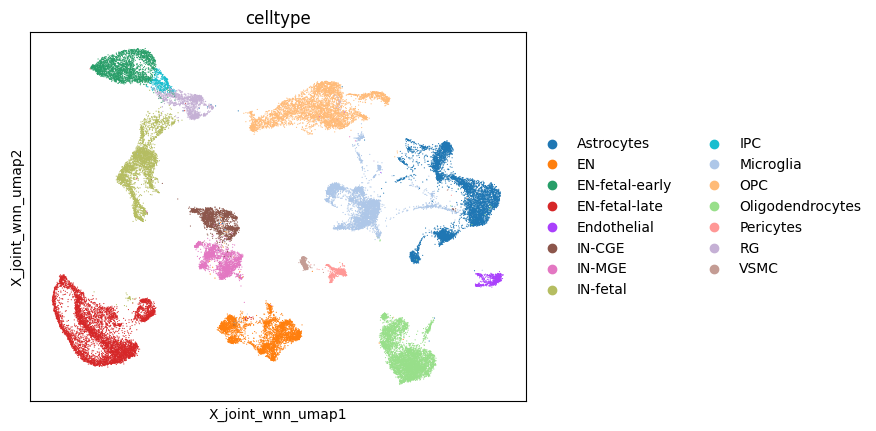

In [390]:
sc.pl.embedding(adata, color = 'celltype', basis='X_joint_wnn_umap')

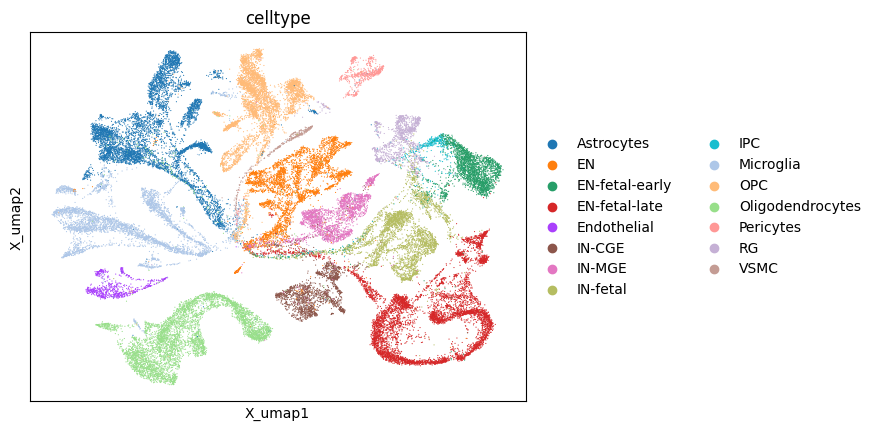

In [391]:
sc.pl.embedding(adata, color = 'celltype', basis='X_umap')

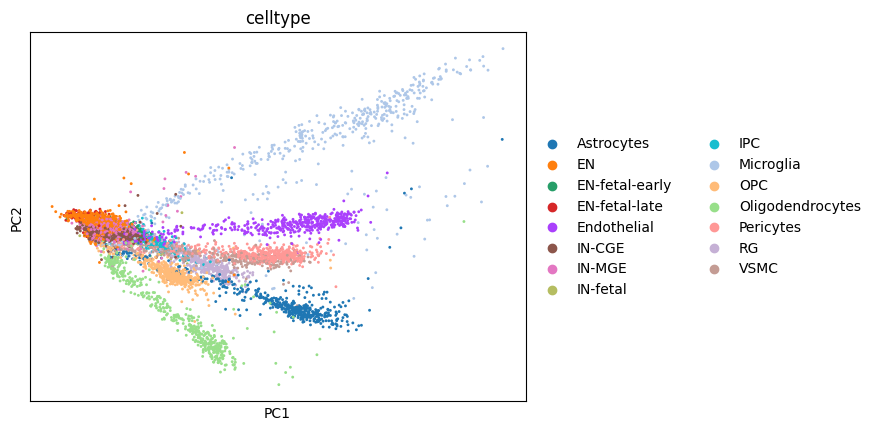

In [392]:
sc.pl.pca(subset_adata, color='celltype')

In [393]:
subset_adata

AnnData object with n_obs × n_vars = 7053 × 30109
    obs: 'author_cell_type', 'age_group', 'donor_id', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'TSS_percentile', 'nucleosome_signal', 'percent_mt', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'is_primary_data', 'batch', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'celltype'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_

In [395]:
subset_adata.obsm

AxisArrays with keys: Author_UMAP, X_joint_wnn_umap, X_pca, X_umap

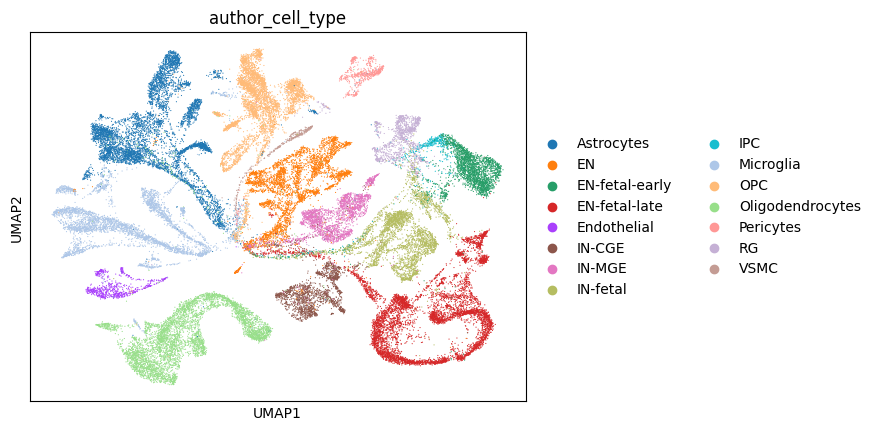

In [396]:
sc.pl.umap(adata, color = 'author_cell_type')

In [397]:
scplus_obj

SCENIC+ object with n_cells x n_genes = 7053 x 18468 and n_cells x n_regions = 7053 x 37414
	metadata_regions:'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc'
	metadata_genes:'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
	metadata_cell:'GEX_author_cell_type', 'GEX_age_group', 'GEX_donor_id', 'GEX_nCount_RNA', 'GEX_nFeature_RNA', 'GEX_nCount_ATAC', 'GEX_nFeature_ATAC', 'GEX_TSS_percentile', 'GEX_nucleosome_signal', 'GEX_percent_mt', 'GEX_assay_ontology_term_id', 'GEX_cell_type_ontology_term_id', 'GEX_development_stage_ontology_term_id', 'GEX_disease_ontology_term_id', 'GEX_self_reported_ethnicity_ontology_term_id', 'GEX_organism_ontology_term_id', 'GEX_sex_ontology_term_id', 'GEX_tissue_ontology_term_id', 'GEX_suspension_type', 'GEX_is_primary_data', 'GEX_batch', 'GEX_tis

In [398]:
#only keep the first two columns of the PCA embedding in order to be able to visualize this in SCope
scplus_obj.dr_cell['GEX_X_pca'] = scplus_obj.dr_cell['GEX_X_pca'].iloc[:, 0:2]
# scplus_obj.dr_cell['GEX_rep'] = scplus_obj.dr_cell['GEX_rep'].iloc[:, 0:2] # I do not have this matrix. It is created in the pbmc tutorial during some step.

In [399]:
scplus_obj

SCENIC+ object with n_cells x n_genes = 7053 x 18468 and n_cells x n_regions = 7053 x 37414
	metadata_regions:'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc'
	metadata_genes:'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
	metadata_cell:'GEX_author_cell_type', 'GEX_age_group', 'GEX_donor_id', 'GEX_nCount_RNA', 'GEX_nFeature_RNA', 'GEX_nCount_ATAC', 'GEX_nFeature_ATAC', 'GEX_TSS_percentile', 'GEX_nucleosome_signal', 'GEX_percent_mt', 'GEX_assay_ontology_term_id', 'GEX_cell_type_ontology_term_id', 'GEX_development_stage_ontology_term_id', 'GEX_disease_ontology_term_id', 'GEX_self_reported_ethnicity_ontology_term_id', 'GEX_organism_ontology_term_id', 'GEX_sex_ontology_term_id', 'GEX_tissue_ontology_term_id', 'GEX_suspension_type', 'GEX_is_primary_data', 'GEX_batch', 'GEX_tis

In [291]:
import pickle
pickle.dump(scplus_obj, open('scplus_obj.pkl', 'wb'))


In [292]:
# In cluster:

work_dir = '/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/Python_Project/ScenicPlus/Zhu_et_al/'

tmp_dir = '/fast/AG_Bunina/Yusuf/temp_scratch'

import pickle
infile = open(work_dir + 'scplus_obj.pkl', 'rb')
scplus_obj = pickle.load(infile)
infile.close()


from scenicplus.wrappers.run_scenicplus import run_scenicplus
try:
    run_scenicplus(
        scplus_obj = scplus_obj,
        variable = ['GEX_author_cell_type'],
        species = 'hsapiens',
        assembly = 'hg38',
        tf_file = work_dir + 'utoronto_human_tfs_v_1.01.txt',
        save_path = work_dir + 'scenicplus/',
        biomart_host = biomart_host,
        upstream = [1000, 150000],
        downstream = [1000, 150000],
        calculate_TF_eGRN_correlation = True,
        calculate_DEGs_DARs = True,
        export_to_loom_file = True,
        export_to_UCSC_file = True,
        path_bedToBigBed = work_dir,
        n_cpu = 12, # 12
        _temp_dir = os.path.join(tmp_dir, 'ray_spill'))
except Exception as e:
    #in case of failure, still save the object
    dill.dump(scplus_obj, open(os.path.join(work_dir, 'scenicplus/scplus_obj.pkl'), 'wb'), protocol=-1)
    raise(e)

2024-03-17 21:05:46,964 SCENIC+_wrapper INFO     /fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/Python_Project/ScenicPlus/Zhu_et_al/scenicplus/ folder already exists.
2024-03-17 21:05:46,965 SCENIC+_wrapper INFO     Merging cistromes
2024-03-17 21:06:56,605 SCENIC+_wrapper INFO     Getting search space
2024-03-17 21:07:01,593 R2G          INFO     Downloading gene annotation from biomart dataset: hsapiens_gene_ensembl
2024-03-17 21:07:17,134 R2G          INFO     Downloading chromosome sizes from: http://hgdownload.cse.ucsc.edu/goldenPath/hg38/bigZips/hg38.chrom.sizes
2024-03-17 21:07:18,097 R2G          INFO     Extending promoter annotation to 10 bp upstream and 10 downstream
Warning! Start and End columns now have different dtypes: int32 and int64
Warning! Start and End columns now have different dtypes: int32 and int64
2024-03-17 21:07:19,795 R2G          INFO     Extending search space to:
            						150000

join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


2024-03-17 21:07:48,854 R2G          INFO     Imploding multiple entries per region and gene
2024-03-17 21:08:58,486 R2G          INFO     Done!
2024-03-17 21:08:58,603 SCENIC+_wrapper INFO     Inferring region to gene relationships
2024-03-17 21:08:58,634 R2G          INFO     Calculating region to gene importances, using GBM method


2024-03-17 21:09:08,396	INFO worker.py:1715 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 
initializing: 0it [00:00, ?it/s]
Running using 12 cores: 0it [00:00, ?it/s]


2024-03-17 21:09:14,023 R2G          INFO     Took 15.389054536819458 seconds
2024-03-17 21:09:14,024 R2G          INFO     Calculating region to gene correlation, using SR method


2024-03-17 21:09:18,728	INFO worker.py:1715 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 
initializing: 0it [00:00, ?it/s]
Running using 12 cores: 0it [00:00, ?it/s]


2024-03-17 21:09:24,283 R2G          INFO     Took 10.258834838867188 seconds
An error occured!
2024-03-17 21:09:24,291 SCENIC+_wrapper INFO     Inferring TF to gene relationships


ValueError: Intersection of gene_names and tf_names is empty.

In [293]:
# My RNA features are ensembl ids. I need to convert them to gene names.

In [462]:
annot

,Chromosome,Start,Strand,Gene,Transcript_type,ensembl_id
37,KI270711.1,24650,-1,NaN,protein_coding,ENSG00000271254
38,KI270711.1,29626,-1,NaN,protein_coding,ENSG00000271254
40,KI270442.1,380608,1,5S_rRNA,rRNA,ENSG00000278457
53,KI270442.1,217401,-1,5_8S_rRNA,rRNA,ENSG00000278294
656,KI270734.1,59711,1,NaN,pseudogene,ENSG00000278573
...,...,...,...,...,...,...
236041,1,36482899,-1,CSF3R,processed_transcript,ENSG00000119535
236042,1,36482934,-1,CSF3R,retained_intron,ENSG00000119535
236043,1,36482051,-1,CSF3R,protein_coding,ENSG00000119535
236044,1,36323645,-1,EVA1B,protein_coding,ENSG00000142694


In [463]:
type(annot)

pandas.core.frame.DataFrame

In [464]:
type(scplus_obj.gene_names)

pandas.core.indexes.base.Index

In [465]:
annot

,Chromosome,Start,Strand,Gene,Transcript_type,ensembl_id
37,KI270711.1,24650,-1,NaN,protein_coding,ENSG00000271254
38,KI270711.1,29626,-1,NaN,protein_coding,ENSG00000271254
40,KI270442.1,380608,1,5S_rRNA,rRNA,ENSG00000278457
53,KI270442.1,217401,-1,5_8S_rRNA,rRNA,ENSG00000278294
656,KI270734.1,59711,1,NaN,pseudogene,ENSG00000278573
...,...,...,...,...,...,...
236041,1,36482899,-1,CSF3R,processed_transcript,ENSG00000119535
236042,1,36482934,-1,CSF3R,retained_intron,ENSG00000119535
236043,1,36482051,-1,CSF3R,protein_coding,ENSG00000119535
236044,1,36323645,-1,EVA1B,protein_coding,ENSG00000142694


In [466]:
import pandas as pd

# Assuming 'gene_names' is a pandas Index or Series containing gene names
# Assuming 'scplus_obj.gene_names' is a pandas Index containing Ensembl IDs

# Filter 'annot' DataFrame to include only rows where 'ensembl_id' is present in 'scplus_obj.gene_names'
filtered_annot = annot[annot['ensembl_id'].isin(scplus_obj.gene_names)]



In [467]:
# Check if every scplus_obj_gene_names exists in the ensembl_id column of the annot DataFrame
all_present = all(scplus_obj.gene_names.isin(annot['ensembl_id']))
print("Are all scplus_obj_gene_names present in the ensembl_id column of the annot DataFrame?", all_present)


Are all scplus_obj_gene_names present in the ensembl_id column of the annot DataFrame? False


In [468]:
filtered_annot

,Chromosome,Start,Strand,Gene,Transcript_type,ensembl_id
37,KI270711.1,24650,-1,NaN,protein_coding,ENSG00000271254
38,KI270711.1,29626,-1,NaN,protein_coding,ENSG00000271254
718,KI270734.1,131494,1,NaN,protein_coding,ENSG00000278817
9134,Y,12537650,1,USP9Y,processed_transcript,ENSG00000114374
9135,Y,12662334,1,USP9Y,processed_transcript,ENSG00000114374
...,...,...,...,...,...,...
236041,1,36482899,-1,CSF3R,processed_transcript,ENSG00000119535
236042,1,36482934,-1,CSF3R,retained_intron,ENSG00000119535
236043,1,36482051,-1,CSF3R,protein_coding,ENSG00000119535
236044,1,36323645,-1,EVA1B,protein_coding,ENSG00000142694


In [469]:
# Keep only rows with unique Ensembl IDs
filtered_annot_unique = filtered_annot.drop_duplicates(subset='ensembl_id')

In [470]:
filtered_annot_unique

,Chromosome,Start,Strand,Gene,Transcript_type,ensembl_id
37,KI270711.1,24650,-1,NaN,protein_coding,ENSG00000271254
718,KI270734.1,131494,1,NaN,protein_coding,ENSG00000278817
9134,Y,12537650,1,USP9Y,processed_transcript,ENSG00000114374
9382,Y,20575776,1,EIF1AY,protein_coding,ENSG00000198692
9579,Y,3002894,1,LINC00278,lncRNA,ENSG00000231535
...,...,...,...,...,...,...
236010,1,36397887,-1,LSM10,processed_transcript,ENSG00000181817
236014,1,36422181,-1,OSCP1,protein_coding,ENSG00000116885
236027,1,36464384,-1,MRPS15,protein_coding,ENSG00000116898
236031,1,36482913,-1,CSF3R,protein_coding,ENSG00000119535


In [471]:
# I checked the code and now will implement:

import pandas as pd

# Assuming 'gene_names' is a pandas Index or Series containing gene names
# Assuming 'scplus_obj.gene_names' is a pandas Index containing Ensembl IDs

# Filter 'annot' DataFrame to include only rows where 'ensembl_id' is present in 'scplus_obj.gene_names'
filtered_annot = annot[annot['ensembl_id'].isin(scplus_obj.gene_names)]

# Keep only rows with unique Ensembl IDs
filtered_annot_unique = filtered_annot.drop_duplicates(subset='ensembl_id')


In [488]:
filtered_annot_unique.shape

(18452, 6)

In [491]:
filtered_annot_unique

,Chromosome,Start,Strand,Gene,Transcript_type,ensembl_id
37,KI270711.1,24650,-1,ENSG00000271254,protein_coding,ENSG00000271254
718,KI270734.1,131494,1,ENSG00000278817,protein_coding,ENSG00000278817
9134,Y,12537650,1,USP9Y,processed_transcript,ENSG00000114374
9382,Y,20575776,1,EIF1AY,protein_coding,ENSG00000198692
9579,Y,3002894,1,LINC00278,lncRNA,ENSG00000231535
...,...,...,...,...,...,...
236010,1,36397887,-1,LSM10,processed_transcript,ENSG00000181817
236014,1,36422181,-1,OSCP1,protein_coding,ENSG00000116885
236027,1,36464384,-1,MRPS15,protein_coding,ENSG00000116898
236031,1,36482913,-1,CSF3R,protein_coding,ENSG00000119535


In [493]:

scplus_names = scplus_obj.gene_names.copy()



In [494]:
scplus_names

Index(['ENSG00000241860', 'ENSG00000237491', 'ENSG00000228794',
       'ENSG00000225880', 'ENSG00000272438', 'ENSG00000230699',
       'ENSG00000188976', 'ENSG00000187961', 'ENSG00000272512',
       'ENSG00000188290',
       ...
       'ENSG00000212907', 'ENSG00000198886', 'ENSG00000198786',
       'ENSG00000198695', 'ENSG00000198727', 'ENSG00000276256',
       'ENSG00000278384', 'ENSG00000273748', 'ENSG00000271254',
       'ENSG00000278817'],
      dtype='object', name='gene_ids', length=18468)

In [496]:
# Convert scplus_names to a list
scplus_names_list = scplus_names.tolist()

# Iterate over the scplus_names
for idx, ensembl_id in enumerate(scplus_names_list):
    # Check if the ensembl_id is in the ensembl_id column of the filtered_annot_unique DataFrame
    if ensembl_id in filtered_annot_unique['ensembl_id'].values:
        # Find the corresponding Gene name for the ensembl_id
        gene_name = filtered_annot_unique.loc[filtered_annot_unique['ensembl_id'] == ensembl_id, 'Gene'].iloc[0]
        # Replace the ensembl_id with the Gene name
        scplus_names_list[idx] = gene_name

In [498]:
scplus_names_list[0:10]

['ENSG00000241860',
 'LINC01409',
 'LINC01128',
 'LINC00115',
 'ENSG00000272438',
 'ENSG00000230699',
 'NOC2L',
 'KLHL17',
 'ENSG00000272512',
 'HES4']

In [501]:
len(scplus_names_list)

18468

In [502]:
# Convert the list back to a pandas Index object
scplus_names_updated = pd.Index(scplus_names_list)

In [503]:

# Create a DataFrame with scplus_obj.gene_names and filtered_gene_names_index
comparison_df = pd.DataFrame({
    'scplus_obj_gene_names': scplus_obj.gene_names,
    'scplus_names_updated': scplus_names_updated
})

# Print the head and tail of the DataFrame to view if everything is alright before the replacement
print("Head of the DataFrame:")
print(comparison_df.head())

print("\nTail of the DataFrame:")
print(comparison_df.tail())

Head of the DataFrame:
  scplus_obj_gene_names scplus_names_updated
0       ENSG00000241860      ENSG00000241860
1       ENSG00000237491            LINC01409
2       ENSG00000228794            LINC01128
3       ENSG00000225880            LINC00115
4       ENSG00000272438      ENSG00000272438

Tail of the DataFrame:
      scplus_obj_gene_names scplus_names_updated
18463       ENSG00000276256      ENSG00000276256
18464       ENSG00000278384      ENSG00000278384
18465       ENSG00000273748      ENSG00000273748
18466       ENSG00000271254      ENSG00000271254
18467       ENSG00000278817      ENSG00000278817


In [506]:
comparison_df.iloc[899,]

scplus_obj_gene_names    ENSG00000064703
scplus_names_updated               DDX20
Name: 899, dtype: object

In [510]:
scplus_obj.metadata_genes['gene_ids'] = scplus_obj.gene_names

In [511]:
scplus_obj.metadata_genes

,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,gene_ids
gene_ids,,,,,,,,,,,,
ENSG00000241860,False,RP11-34P13.13,NCBITaxon:9606,gene,7559,567,False,554,0.009113,98.750282,403.962402,ENSG00000241860
ENSG00000237491,False,LINC01409,NCBITaxon:9606,gene,8413,3376,False,3263,0.056578,92.639296,2508.073730,ENSG00000237491
ENSG00000228794,False,LINC01128,NCBITaxon:9606,gene,15682,2885,False,2797,0.047080,93.690503,2087.031250,ENSG00000228794
ENSG00000225880,False,LINC00115,NCBITaxon:9606,gene,1317,358,False,350,0.005616,99.210467,248.958374,ENSG00000225880
ENSG00000272438,False,RP11-54O7.16,NCBITaxon:9606,gene,351,423,False,416,0.006919,99.061584,306.698975,ENSG00000272438
...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000276256,False,ENSG00000276256.1,NCBITaxon:9606,gene,2195,3232,False,3152,0.052523,92.889691,2328.310059,ENSG00000276256
ENSG00000278384,False,ENSG00000278384.1,NCBITaxon:9606,gene,3027,446,False,422,0.007054,99.048049,312.702820,ENSG00000278384
ENSG00000273748,False,ENSG00000273748.1,NCBITaxon:9606,gene,372,8182,False,7859,0.144048,82.271599,6385.962891,ENSG00000273748


In [513]:
scplus_obj.gene_names

Index(['ENSG00000241860', 'ENSG00000237491', 'ENSG00000228794',
       'ENSG00000225880', 'ENSG00000272438', 'ENSG00000230699',
       'ENSG00000188976', 'ENSG00000187961', 'ENSG00000272512',
       'ENSG00000188290',
       ...
       'ENSG00000212907', 'ENSG00000198886', 'ENSG00000198786',
       'ENSG00000198695', 'ENSG00000198727', 'ENSG00000276256',
       'ENSG00000278384', 'ENSG00000273748', 'ENSG00000271254',
       'ENSG00000278817'],
      dtype='object', name='gene_ids', length=18468)

In [514]:
scplus_names_updated

Index(['ENSG00000241860', 'LINC01409', 'LINC01128', 'LINC00115',
       'ENSG00000272438', 'ENSG00000230699', 'NOC2L', 'KLHL17',
       'ENSG00000272512', 'HES4',
       ...
       'ENSG00000212907', 'ENSG00000198886', 'ENSG00000198786',
       'ENSG00000198695', 'ENSG00000198727', 'ENSG00000276256',
       'ENSG00000278384', 'ENSG00000273748', 'ENSG00000271254',
       'ENSG00000278817'],
      dtype='object', length=18468)

In [516]:
subset_adata.raw.to_adata()

AnnData object with n_obs × n_vars = 7053 × 30109
    obs: 'author_cell_type', 'age_group', 'donor_id', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'TSS_percentile', 'nucleosome_signal', 'percent_mt', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'is_primary_data', 'batch', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'celltype'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 

In [ ]:
subset_adata = subset_adata[:, scplus_obj.gene_names]

In [520]:
subset_adata

View of AnnData object with n_obs × n_vars = 7053 × 18468
    obs: 'author_cell_type', 'age_group', 'donor_id', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'TSS_percentile', 'nucleosome_signal', 'percent_mt', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'is_primary_data', 'batch', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'celltype'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 

In [522]:
subset_adata.var_names = scplus_names_updated

In [523]:
subset_adata.var_names

Index(['ENSG00000241860', 'LINC01409', 'LINC01128', 'LINC00115',
       'ENSG00000272438', 'ENSG00000230699', 'NOC2L', 'KLHL17',
       'ENSG00000272512', 'HES4',
       ...
       'ENSG00000212907', 'ENSG00000198886', 'ENSG00000198786',
       'ENSG00000198695', 'ENSG00000198727', 'ENSG00000276256',
       'ENSG00000278384', 'ENSG00000273748', 'ENSG00000271254',
       'ENSG00000278817'],
      dtype='object', length=18468)

In [528]:
subset_adata_raw = subset_adata.raw.to_adata().copy()

In [529]:
subset_adata_raw 

AnnData object with n_obs × n_vars = 7053 × 30109
    obs: 'author_cell_type', 'age_group', 'donor_id', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'TSS_percentile', 'nucleosome_signal', 'percent_mt', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'is_primary_data', 'batch', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'celltype'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 

In [530]:
subset_adata_raw = subset_adata_raw[:, scplus_obj.gene_names]

In [531]:
subset_adata_raw

View of AnnData object with n_obs × n_vars = 7053 × 18468
    obs: 'author_cell_type', 'age_group', 'donor_id', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'TSS_percentile', 'nucleosome_signal', 'percent_mt', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'is_primary_data', 'batch', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'celltype'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
 

In [532]:
subset_adata_raw.var_names = scplus_names_updated

In [533]:
subset_adata_raw.var

,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
ENSG00000241860,False,RP11-34P13.13,NCBITaxon:9606,gene,7559,567,False,554,0.009113,98.750282,403.962402
LINC01409,False,LINC01409,NCBITaxon:9606,gene,8413,3376,False,3263,0.056578,92.639296,2508.073730
LINC01128,False,LINC01128,NCBITaxon:9606,gene,15682,2885,False,2797,0.047080,93.690503,2087.031250
LINC00115,False,LINC00115,NCBITaxon:9606,gene,1317,358,False,350,0.005616,99.210467,248.958374
ENSG00000272438,False,RP11-54O7.16,NCBITaxon:9606,gene,351,423,False,416,0.006919,99.061584,306.698975
...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000276256,False,ENSG00000276256.1,NCBITaxon:9606,gene,2195,3232,False,3152,0.052523,92.889691,2328.310059
ENSG00000278384,False,ENSG00000278384.1,NCBITaxon:9606,gene,3027,446,False,422,0.007054,99.048049,312.702820
ENSG00000273748,False,ENSG00000273748.1,NCBITaxon:9606,gene,372,8182,False,7859,0.144048,82.271599,6385.962891
ENSG00000271254,False,ENSG00000271254.6,NCBITaxon:9606,gene,4520,1047,False,1019,0.016748,97.701331,742.424622


In [536]:
from scenicplus.scenicplus_class import create_SCENICPLUS_object
import numpy as np

# Define a lambda function to remove "___cisTopic" from ATAC cell barcodes
barcode_transform_func = lambda x: x.replace("___cisTopic", "")

# SCENICPLUS REQUIRES RAW RNA MATRIX, THEREFORE I USE subset_adata_raw.

scplus_obj = create_SCENICPLUS_object(
    GEX_anndata = subset_adata_raw, 
    cisTopic_obj = cistopic_obj,
    menr = menr
)

scplus_obj.X_EXP = np.array(scplus_obj.X_EXP.todense())



2024-03-18 01:05:23,491 cisTopic     INFO     Imputing region accessibility
2024-03-18 01:05:23,492 cisTopic     INFO     Impute region accessibility for regions 0-20000
2024-03-18 01:05:24,804 cisTopic     INFO     Impute region accessibility for regions 20000-40000
2024-03-18 01:05:26,114 cisTopic     INFO     Impute region accessibility for regions 40000-60000
2024-03-18 01:05:27,423 cisTopic     INFO     Impute region accessibility for regions 60000-80000
2024-03-18 01:05:27,434 cisTopic     INFO     Done!


In [537]:
# AFTER CREATION OF SCENICPLUS OBJECT:
# We can also filter low accessible regions and low expressed genes. This recommended to avoid getting false relationships with these regions and genes.

from scenicplus.preprocessing.filtering import filter_genes

filter_genes(scplus_obj, min_pct = 0.5)


2024-03-18 01:05:43,279 Preprocessing INFO     Going from 18468 genes to 18468 genes.


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [538]:

from scenicplus.preprocessing.filtering import filter_regions

filter_regions(scplus_obj, min_pct = 0.5)

2024-03-18 01:06:05,470 Preprocessing INFO     Going from 60027 regions to 37414 regions.


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [490]:
filtered_gene_names_index

Index(['ENSG00000271254', 'ENSG00000278817', 'USP9Y', 'EIF1AY', 'LINC00278',
       'TBL1Y', 'PCDH11Y', 'NLGN4Y', 'TTTY10', 'TTTY14',
       ...
       'S100A1', 'CHTOP', 'SNAPIN', 'SH3D21', 'STK40', 'LSM10', 'OSCP1',
       'MRPS15', 'CSF3R', 'EVA1B'],
      dtype='object', name='Gene', length=18452)

In [475]:
scplus_obj.gene_names[0:4]

Index(['ENSG00000241860', 'ENSG00000237491', 'ENSG00000228794',
       'ENSG00000225880'],
      dtype='object', name='gene_ids')

In [476]:
len(scplus_obj.gene_names)

18468

In [482]:
type(filtered_gene_names_index)

pandas.core.indexes.base.Index

In [483]:
filtered_gene_names_index.values

array(['ENSG00000271254', 'ENSG00000278817', 'USP9Y', ..., 'MRPS15',
       'CSF3R', 'EVA1B'], dtype=object)

In [484]:
filtered_gene_names_index.tolist()[0:4]

['ENSG00000271254', 'ENSG00000278817', 'USP9Y', 'EIF1AY']

In [486]:
len(scplus_obj.gene_names)

18468

In [487]:
len(filtered_gene_names_index)

18452

ValueError: All arrays must be of the same length

In [415]:
import pandas as pd

# Assuming 'scplus_obj.gene_names' is a pandas Index containing Ensembl IDs
# Assuming 'annot' DataFrame has the 'Gene' column containing gene names or NaN

# Filter 'annot' DataFrame to include only rows where 'ensembl_id' is present in 'scplus_obj.gene_names'
filtered_annot = annot[annot['ensembl_id'].isin(scplus_obj.gene_names)]

# Keep only rows with unique Ensembl IDs
filtered_annot_unique = filtered_annot.drop_duplicates(subset='ensembl_id')

# Replace NaN values in 'Gene' column with corresponding Ensembl IDs
filtered_annot_unique['Gene'] = filtered_annot_unique['Gene'].fillna(filtered_annot_unique['ensembl_id'])

# Extract the 'Gene' column from the filtered DataFrame
filtered_gene_names_index = filtered_annot_unique['Gene']

# Print the head and tail of the filtered gene names to verify
print("Head of filtered gene names:")
print(filtered_gene_names_index.head())

print("\nTail of filtered gene names:")
print(filtered_gene_names_index.tail())

Head of filtered gene names:
42     ENSG00000271254
62     ENSG00000278817
218              USP9Y
249             EIF1AY
434             TTTY10
Name: Gene, dtype: object

Tail of filtered gene names:
249467      EXTL1
249477     PDIK1L
249481    FAM110D
249490     ZNF593
249492     CNKSR1
Name: Gene, dtype: object


In [416]:
filtered_gene_names_index.shape

(18415,)

In [417]:
filtered_annot_unique.shape

(18415, 6)

In [418]:
scplus_obj.gene_names.shape

(18468,)

In [419]:
scplus_obj.X_EXP.shape

(7053, 18468)

In [420]:
subset_adata.X.shape

(7053, 30109)

In [421]:
scplus_obj.gene_names

Index(['ENSG00000241860', 'ENSG00000237491', 'ENSG00000228794',
       'ENSG00000225880', 'ENSG00000272438', 'ENSG00000230699',
       'ENSG00000188976', 'ENSG00000187961', 'ENSG00000272512',
       'ENSG00000188290',
       ...
       'ENSG00000212907', 'ENSG00000198886', 'ENSG00000198786',
       'ENSG00000198695', 'ENSG00000198727', 'ENSG00000276256',
       'ENSG00000278384', 'ENSG00000273748', 'ENSG00000271254',
       'ENSG00000278817'],
      dtype='object', name='gene_ids', length=18468)

In [422]:
gene_symbols

ensembl_id
ENSG00000271254       NaN
ENSG00000271254       NaN
ENSG00000277196       NaN
ENSG00000277196       NaN
ENSG00000278817       NaN
                    ...  
ENSG00000142675    CNKSR1
ENSG00000142675    CNKSR1
ENSG00000142675    CNKSR1
ENSG00000142675    CNKSR1
ENSG00000142675    CNKSR1
Name: Gene, Length: 186770, dtype: object

In [423]:
scplus_obj.gene_names.tolist()[0:5]

['ENSG00000241860',
 'ENSG00000237491',
 'ENSG00000228794',
 'ENSG00000225880',
 'ENSG00000272438']

In [539]:
# I will start to create scenicplus object from the beginning. I will change the variable names from ensembl id to gene symbols in the adata object and then continue to the analysis.

In [540]:
import session_info

In [542]:
session_info.show()